In [1]:
__author__ = "Lisette Espin"
__copyright__ = "Copyright 2019, GESIS / USC-ISI"
__credits__ = ["Lisette Espin-Noboa", 
               "Fariba Karimi", 
               "Bruno Ribeiro",
               "Kristina Lerman",
               "Claudia Wagner"]
__license__ = "GPL"
__version__ = "1.0.1"
__maintainer__ = "Lisette Espin"
__email__ = "lisette.espin@gesis.org"
__status__ = "Development"

<h1 style="text-align: center;">Relational Classification Plots on Synthetic Networks</h1>

<h2>Dependencies</h2>

In [2]:
%load_ext autoreload
%autoreload 2

from org.gesis.network.network import Network
from org.gesis.sampling.sampling import Sampling
from org.gesis.local.local import Local
from org.gesis.relational.relational import Relational
from org.gesis.inference.inference import Inference
from utils import viz
from utils import io

<h2>Parameters</h2>

In [10]:
kind = "BAH"                    # network generative model type
N = 2000                        # number of nodes
m = 4                           # minimun degree (proxy of density)
H = 0.6                         # homophily
B = 0.5                         # class balance (minority fraction)
sampling = "all"              # subgraph sampling method (nodes, nedges, degree, neighbors, partial_crawls)
pseeds = 0.2                    # fraction of nodes to sample 
LC = "prior"                    # local model
RC = "nBC"                      # relational model
CI = "relaxation"               # inference
IGNORE = 0                      # IGNORE class value
OUTPUT = "../results-individual"   # directory to store results

<h2>Load results</h2>

In [18]:
df_results = Inference.get_all_results_as_dataframe(OUTPUT, kind, sampling=sampling, njobs=1, verbose=False)
df_results.head()

,N,m,B,H,i,x,sampling,pseeds,epoch,rocauc,mae,ccm,ccM,bias,lag
0,2000,4,0.1,0.1,1,1,nodes,0.2,1,0.997123,0.021875,0.823171,0.995822,0.452542,661.314135
1,2000,4,0.3,0.1,1,1,nodes,0.8,1,0.999495,0.025000,0.937008,0.992674,0.485576,140.577953
2,2000,4,0.1,0.1,1,1,nodes,0.8,1,0.999010,0.022500,0.840909,0.994382,0.458188,179.019043
3,2000,4,0.5,0.1,1,1,nodes,0.8,1,0.999099,0.025000,0.979487,0.970732,0.502245,138.722231
4,2000,3,0.1,0.1,1,1,nedges,0.8,1,0.998757,0.012500,0.789474,0.997375,0.441825,122.929474


<h2>--- RQ1 ---</h2>

<h3>Network structure vs. Global performance</h3>

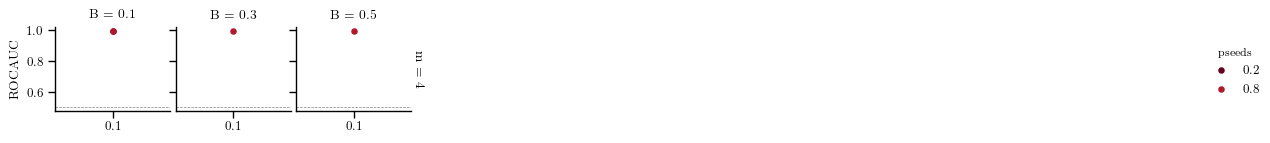

In [14]:
fn = None
viz.plot_rocauc_vs_homophily_per_B_m_pseeds(df_results.query("sampling=='nodes' & N==2000 & m==4"), latex=True, fn=fn)

/home/lespin/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:848: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout()


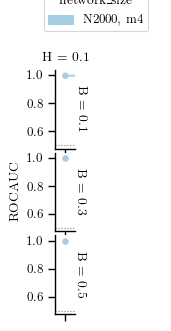

In [15]:
fn = None
viz.plot_rocauc_vs_pseeds_per_B_N_m(df_results.query("sampling=='nodes'"), latex=True, fn=fn)

<h3>Regression to the mean global performance</h3>

<h3>Real World vs. Model</h3>

<h2>--- RQ2 ---</h2>

<h3>Global performance</h3>

<h3>Quality of estimates</h3>

<h3>Utility of estimates</h3>

<h2>--- RQ3 ---</h2>

<h3>Fairness</h3>

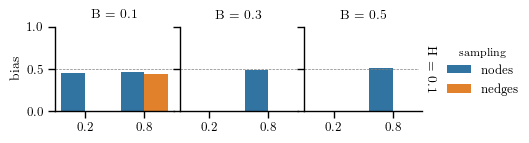

In [21]:
fn = None
viz.plot_bias_vs_pseeds_per_B_H_sampling(df_results.query("N==2000 & m<15"), latex=True, fn=fn)